# Proyek Analisis Data: Bike Sharing
- **Nama:** Azrian Rifqi Radhitya
- **Email:** azrianrifqi115@gmail.com
- **ID Dicoding:** azrianrifq

## Menentukan Pertanyaan Bisnis

- Apa dampak cuaca terhadap jumlah rental sepeda, dan apakah dampaknya berbeda untuk pengguna biasa vs terdaftar?
- Pada kondisi cuaca apa bike sharing paling sedikit digunakan, dan apakah ini konsisten di semua musim?
- Apakah ada perbedaan signifikan antara jumlah pengguna pada hari kerja vs akhir pekan?
- Apakah ada korelasi antara suhu dengan jumlah pengguna? Bagaimana pengaruhnya?

## Import Semua Packages/Library yang Digunakan

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Wrangling

### 1.1 Gathering Data

In [54]:
# membaca berkas file csv
data_path = 'data/'
hour_df = pd.read_csv(f'{data_path}hour.csv')
day_df = pd.read_csv(f'{data_path}day.csv')

In [55]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [56]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [57]:
print(f'Terdapat {hour_df.shape[0]} baris dan {hour_df.shape[1]} kolom pada dataset hour')
print(f'Terdapat {day_df.shape[0]} baris dan {day_df.shape[1]} kolom pada dataset day')

Terdapat 17379 baris dan 17 kolom pada dataset hour
Terdapat 731 baris dan 16 kolom pada dataset day


#### Karakteristik dataset
Kedua dataset memiliki kolom yang sama sebagai berikut, kecuali kolom hr yang tidak ada di berkas day.csv
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### 1.2 Assessing Data

#### 1.2.1 Menilai Tabel `hour_df` dan `day_df`

In [58]:
# memeriksa tipe data dari masing-masing kolom 
hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

Hasil penilaian
* Dataset `hour_df` tidak akan digunakan karena pertanyaan bisnis tidak membutuhkan kolom `hr`
* Kolom `dteday` memiliki tipe data object, seharusnya kolom tersebut bertipe data `datetime` karena berisikan tanggal
* Kolom `yr` `season` `mnth` `weekday` `weathersit` lebih baik diubah menjadi string supaya visualisasi data menjadi lebih baik 
* Kolom `temp` dan `atemp` sebaiknya diubah ke dalam bentuk sebelum normalisasi supaya lebih relevan dan mudah dipahami audiens


#### 1.2.2 Mengidentifikasi Missing Value

In [59]:
# mengidentifikasi keberadaan missing value pada dataset hour
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [60]:
# mengidentifikasi keberadaan missing value pada dataset day
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ditemukan adanya missing value pada kedua dataset sehingga penanganan missing value tidak perlu dilakukan.

#### 1.2.3 Memeriksa Duplikasi

In [61]:
# memeriksa duplikasi pada masing-masing dataset
print('Jumlah duplikasi pada dataset hour: ', hour_df.duplicated().sum())
print('Jumlah duplikasi pada dataset day: ', day_df.duplicated().sum())

Jumlah duplikasi pada dataset hour:  0
Jumlah duplikasi pada dataset day:  0


Tidak ditemukan adanya duplikasi data pada kedua dataset sehingga penanganan duplikasi tidak perlu dilakukan.

#### 1.2.4 Memeriksa Parameter Statistik

In [62]:
# memeriksa parameter statistik untuk kolom numerik pada dataset hour
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [63]:
# memeriksa parameter statistik untuk kolom numerik pada dataset day
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak ditemukan adanya keanehan pada parameter statistik.

### 1.3 Cleaning Data

#### 1.3.1 Rancangan Pembersihan Data
* Mengubah tipe data pada kolom `dteday` yang pada awalnya object menjadi datetime
* Mengubah isi kolom `yr` dari numerik menjadi string
* Mengubah isi kolom `season` dari numerik menjadi string (angka 1-4)
* Mengubah isi kolom `mnth` dari numerik menjadi string (angka 1-12)
* Mengubah isi kolom `weekday` dari numerik menjadi string (angka 0-6 dengan 0 sebagai hari Minggu)
* Mengubah isi kolom `weathersit` dari numerik menjadi stringa (angka 1-4)
* Mengubah isi kolom `temp` dan `atemp` menjadi sebelum dinormalisasikan

In [64]:
# mengubah tipe data pada kolom dteday menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

# mengubah isi kolom temp dan atemp
day_df['temp'] = day_df['temp']*41 
day_df['atemp'] = day_df['atemp']*50

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### 1.3.2 Konversi Tipe Data Int menjadi Category

In [65]:
# mengubah tipe data kolom berikut dari integer menjadi category
columns_to_convert = ['yr', 'season', 'mnth', 'weekday', 'weathersit']

# konversi menggunakan fungsi astype()
for column in columns_to_convert:
    day_df[column] = day_df[column].astype('category')

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(5), datetime64

#### 1.3.3 Melakukan Subtitusi String pada Angka Numerik

In [66]:
# mengubah isi kolom season, mnth, weekday, dan weathersit dari numerik menjadi string
# dikarenakan dataframe merupakan kumpulan dari beberapa series maka kita dapat menggunakan fungsi map()

day_df['yr'] = day_df['yr'].map({
    0: '2011', 1: '2012'
})

day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

day_df['mnth'] = day_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sept',
    10: 'Oct', 11: 'Nov', 12: 'Dec'
})

day_df['weekday'] = day_df['weekday'].map({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
})

day_df['weathersit'] = day_df['weathersit'].map({
1: 'Clear or Partly Cloudy', 2: 'Mist or Cloudy',
3: 'Light Snow or Rain', 4: 'Heavy Rain or Snow'
})

day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,Saturday,0,Mist or Cloudy,14.110847,18.18125,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sunday,0,Mist or Cloudy,14.902598,17.68695,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Monday,1,Clear or Partly Cloudy,8.050924,9.47025,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tuesday,1,Clear or Partly Cloudy,8.200000,10.60610,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wednesday,1,Clear or Partly Cloudy,9.305237,11.46350,0.436957,0.186900,82,1518,1600


## 2. Exploratory Data Analysis (EDA)

### 2.1 Explore dataframe `day_df`

#### 2.1.1 Membuat Kolom Baru bernama Weekend yang Berisikan 1 Apabila Hari Sabtu atau Minggu

In [67]:
day_df['weekend'] = day_df['weekday'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

#### 2.1.2 Pengelompokkan Jumlah Penyewa Terdaftar maupun kasual berdasarkan Cuaca

In [68]:
day_df.groupby(by='weathersit').agg({
    'cnt' : ['sum', 'mean'],
    'casual' : ['sum', 'mean'],
    'registered' : ['sum', 'mean']
 })

C:\Users\Azrian.PC\AppData\Local\Temp\ipykernel_18028\163536119.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weathersit').agg({


cnt               casual             registered  \
                            sum         mean     sum        mean        sum   
weathersit                                                                    
Clear or Partly Cloudy  2257952  4876.786177  446346  964.030238    1811606   
Mist or Cloudy           996858  4035.862348  169776  687.352227     827082   
Light Snow or Rain        37869  1803.285714    3895  185.476190      33974   

                                     
                               mean  
weathersit                           
Clear or Partly Cloudy  3912.755940  
Mist or Cloudy          3348.510121  
Light Snow or Rain      1617.809524

Berdasarkan pengelompokkan di atas, penyewa terbanyak terjadi ketika cuaca adalah `Clear or Partly Cloudy` dan dampak yang terjadi pada penyewa terdaftar dan kasual adalah sama (sama-sama bergantung pada cuaca). Selain itu, ketika cuaca merupakan `Heavy Rain or Snow` tidak ada penyewa sama sekali.

#### 2.1.3 Pengelompokkan Jumlah Penyewa berdasarkan Musim dan Cuaca

In [69]:
day_df.groupby(by=['season', 'weathersit']).agg({
    'cnt' : ['sum', 'mean'],
    'casual' : ['sum', 'mean'],
    'registered' : ['sum', 'mean']
 })


C:\Users\Azrian.PC\AppData\Local\Temp\ipykernel_18028\2912856001.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by=['season', 'weathersit']).agg({


cnt               casual               \
                                  sum         mean     sum         mean   
season weathersit                                                         
Spring Clear or Partly Cloudy  312036  2811.135135   41562   374.432432   
       Mist or Cloudy          155573  2357.166667   18779   284.530303   
       Light Snow or Rain        3739   934.750000     281    70.250000   
Summer Clear or Partly Cloudy  626986  5548.548673  146388  1295.469027   
       Mist or Cloudy          288096  4236.705882   56714   834.029412   
       Light Snow or Rain        3507  1169.000000     420   140.000000   
Fall   Clear or Partly Cloudy  799443  5878.257353  167945  1234.889706   
       Mist or Cloudy          250679  5222.479167   56407  1175.145833   
       Light Snow or Rain       11007  2751.750000    1739   434.750000   
Winter Clear or Partly Cloudy  519487  5043.563107   90451   878.165049   
       Mist or Cloudy          302510  4654.000000   37876   582.707692   
       Light Snow or Rain       19616  1961.600000    1455   145.500000   

                              registered               
                                     sum         mean  
season weathersit                                      
Spring Clear or Partly Cloudy     270474  2436.702703  
       Mist or Cloudy             136794  2072.636364  
       Light Snow or Rain           3458   864.500000  
Summer Clear or Partly Cloudy     480598  4253.079646  
       Mist or Cloudy             231382  3402.676471  
       Light Snow or Rain           3087  1029.000000  
Fall   Clear or Partly Cloudy     631498  4643.367647  
       Mist or Cloudy             194272  4047.333333  
       Light Snow or Rain           9268  2317.000000  
Winter Clear or Partly Cloudy     429036  4165.398058  
       Mist or Cloudy             264634  4071.292308  
       Light Snow or Rain          18161  1816.100000

Dampak cuaca yang dihasilkan juga konsisten pada setiap musim yang artinya pada setiap musim, cuaca `Clear or Partly Cloud` tetap memiliki jumlah penyewa terbanyak.

#### 2.1.4 Pengelompokkan Jumlah Penyewa berdasarkan Hari

In [70]:
count_weekday = day_df.groupby(by='weekday').agg({
    'cnt' : ['sum', 'mean']
})

count_weekday.sort_values(by=('cnt', 'sum'), ascending=False)

C:\Users\Azrian.PC\AppData\Local\Temp\ipykernel_18028\2381614736.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_weekday = day_df.groupby(by='weekday').agg({


cnt             
              sum         mean
weekday                       
Friday     487790  4690.288462
Thursday   485395  4667.259615
Saturday   477807  4550.542857
Wednesday  473048  4548.538462
Tuesday    469109  4510.663462
Monday     455503  4338.123810
Sunday     444027  4228.828571

Berdasarkan pengelompokkkan di atas, rata-rata penyewa hari kerja vs hari weekend (Sabtu dan Minggu) tidak jauh berbeda dengan urutan jumlah penyewa terbesar hingga terkecil: Friday-Thursday-Saturday-Wednesday-Tuesday-Monday-Sunday.

#### 2.1.5 Pengelompokkan Jumlah Penyewa berdasarkan Hari Kerja dan Bukan Hari Kerja

In [71]:
day_df.groupby(by='workingday').agg({
    'cnt' : ['max', 'min', 'mean', 'sum']
})

cnt                           
             max  min         mean      sum
workingday                                 
0           8714  605  4330.168831  1000269
1           8362   22  4584.820000  2292410

Berdasarkan pengelompokkkan di atas, sebagian besar orang lebih memilih untuk menyewa di hari kerja dibandingkan hari libur.

## 3. Visualization & Explanatory Analysis

### Pertanyaan 1: Apa dampak cuaca terhadap jumlah rental sepeda dan apakah dampaknya berbeda untuk pengguna biasa vs terdaftar?

C:\Users\Azrian.PC\AppData\Local\Temp\ipykernel_18028\1021278296.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weathers_count_df = day_df.groupby(by='weathersit').agg({


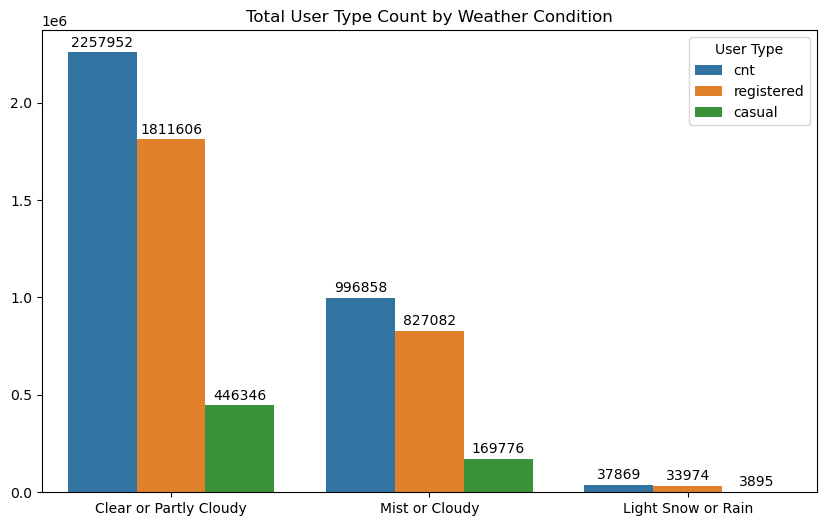

In [72]:
# Prepare the data
weathers_count_df = day_df.groupby(by='weathersit').agg({
    'cnt': 'sum',
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()

# Reshape the DataFrame to make plotting easier
weathers_melted_df = weathers_count_df.melt(
    id_vars='weathersit', 
    value_vars=['cnt', 'casual', 'registered'], 
    var_name='Type', 
    value_name='Count')

weathers_melted_df = weathers_melted_df.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
colors_ = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green
# Create a single barplot
sns.barplot(x='weathersit', y='Count', hue='Type', palette=colors_, data=weathers_melted_df)
plt.title('Total User Type Count by Weather Condition')
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title='User Type')

# Add value labels on top of each bar
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10, padding=2)

plt.show()

Berdasarkan grafik yang ditampilkan kita dapat menarik beberapa kesimpulan penting, 
1. Pengaruh Cuaca terhadap Jumlah Pengguna
    - Kita dapat melihat bahwa cuaca `Clear or Partly Cloudy` memiliki dampak paling positif dengan jumlah pengguna tertinggi untuk semua tipe pengguna, diikuti oleh `Mist or Cloudy` dan diakhiri oleh `Light Snow or Rain` dengan dampak paling negatif karena memiliki pengguna terendah. 

2. Pengaruh Cuaca Konsisten di Seluruh Tipe Pengguna
    - Dampaknya pada tipe pengguna adalah sama, baik untuk pengguna terdaftar (registered) maupun biasa (casual) memiliki pola penggunaan berdasarkan cuaca yang konsisten, artinya adalah pengguna terdaftar selalu lebih banyak dibandingkan pengguna biasa dalam semua kondisi cuaca.

### Pertanyaan 2: Pada kondisi cuaca apa bike sharing paling sedikit digunakan dan apakah ini konsisten di semua musim?

C:\Users\Azrian.PC\AppData\Local\Temp\ipykernel_18028\3344334075.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_weather_df = day_df.groupby(by=['season', 'weathersit']).agg({


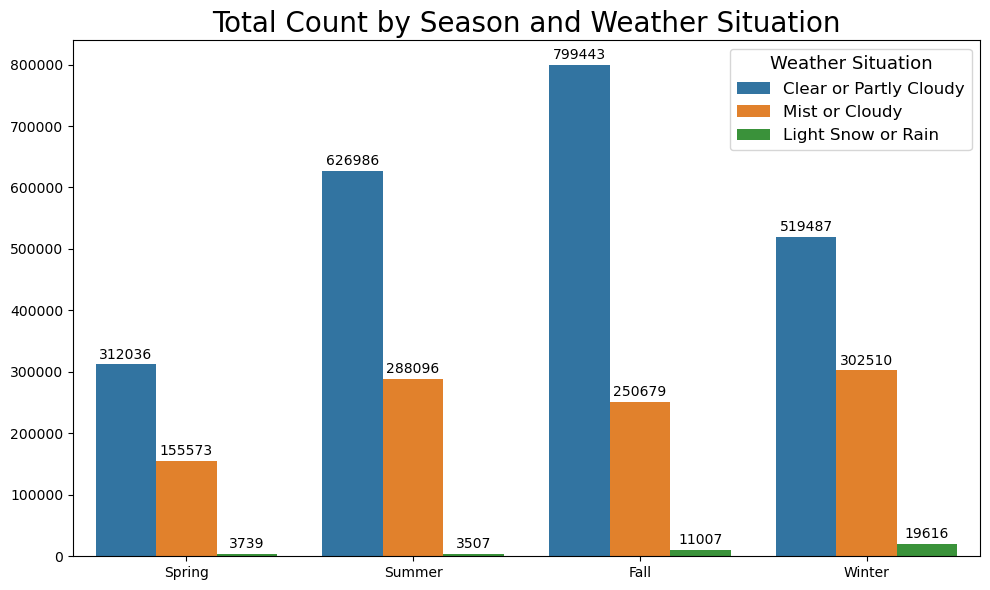

In [73]:
# Lakukan groupby dan agregasi
season_weather_df = day_df.groupby(by=['season', 'weathersit']).agg({
    'cnt': 'sum',
}).reset_index()

plt.figure(figsize=(10, 6))
colors_ = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

sns.barplot(x='season', y='cnt', hue='weathersit',  palette=colors_, data=season_weather_df.sort_values(by='cnt', ascending=False))
plt.title('Total Count by Season and Weather Situation', fontsize=20)
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title='Weather Situation', title_fontsize='13', fontsize='12')

# Add value labels on top of each bar
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10, padding=2)

plt.tight_layout()
plt.show()

- Berdasarkan grafik yang ditampilkan dapat diambil kesimpulan bahwa
    - Bike sharing paling sedikit digunakan pada kondisi cuaca `Light Snow or Rain` dapat dilihat bahwa batang hijau yang mewakili kondisi cuaca tersebut selalu paling rendah di setiap musim.
    Pola ini konsisten di setiap musim, pada setiap musim (spring, summer, fall, winter) penggunaan bike sharing selalu paling rendah saat kondisi cuaca `Light Snow or Rain`.

### Pertanyaan 3: Apakah ada perbedaan signifikan antara jumlah pengguna pada hari kerja vs akhir pekan?

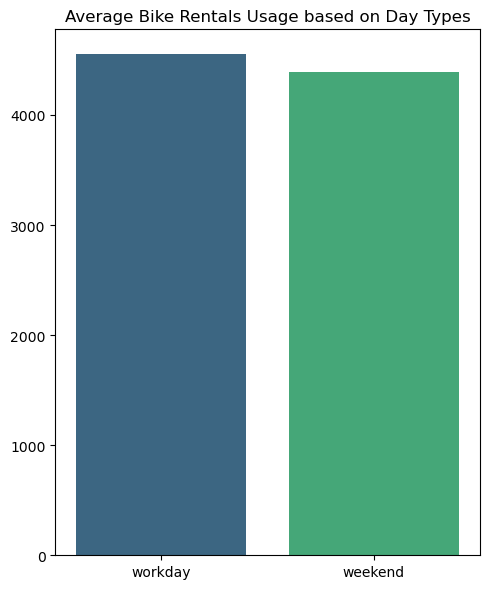

In [74]:
plt.figure(figsize=(5, 6))

# Hitung rata-rata 'cnt' berdasarkan 'weekend'
count_weekend = day_df.groupby(by='weekend').agg({
    'cnt': 'mean'
}).reset_index()

# Ganti nama kolom 'weekend' dengan label yang lebih deskriptif
count_weekend['weekend'] = count_weekend['weekend'].map({
    0: 'workday',
    1: 'weekend'
})

sns.barplot(x='weekend', y='cnt', hue='weekend', data=count_weekend, palette='viridis')
plt.title('Average Bike Rentals Usage based on Day Types')
plt.xlabel(None)
plt.ylabel(None)
plt.tight_layout()
plt.show()

#

Berdasarkan grafik yang ditampilkan
- Tidak terdapat perbedaan yang signifikan, penggunaan rata-rata rental sepeda pada hari kerja dan akhir pekan memang berbeda namun perbedaannya tidak signifikan, rata-rata jumlah pengguna sepeda pada hari kerja sedikit lebih tinggi dibandingkan akhir pekan, perbedaan antar keduanya relatif kecil dengan selisih sekitar 100-150 pengguna.

- Kesimpulannya, terlepas dari perbedaan yang kurang signifikan antara hari kerja dan akhir pekan, hari kerja memang memiliki jumlah pengguna yang sedikit lebih tinggi, namun layanan Bike Sharing tetap digunakan secara konsisten baik pada hari kerja maupun hari libur. Ini menandakan bahwa layanan tersebut digunakan sepanjang minggu, dengan sedikit kecendrungan pengguna yang lebih memakai pada hari-hari kerja.

### Pertanyaan 4: Apakah ada korelasi antara suhu dengan jumlah pengguna? Bagaimana pengaruhnya?

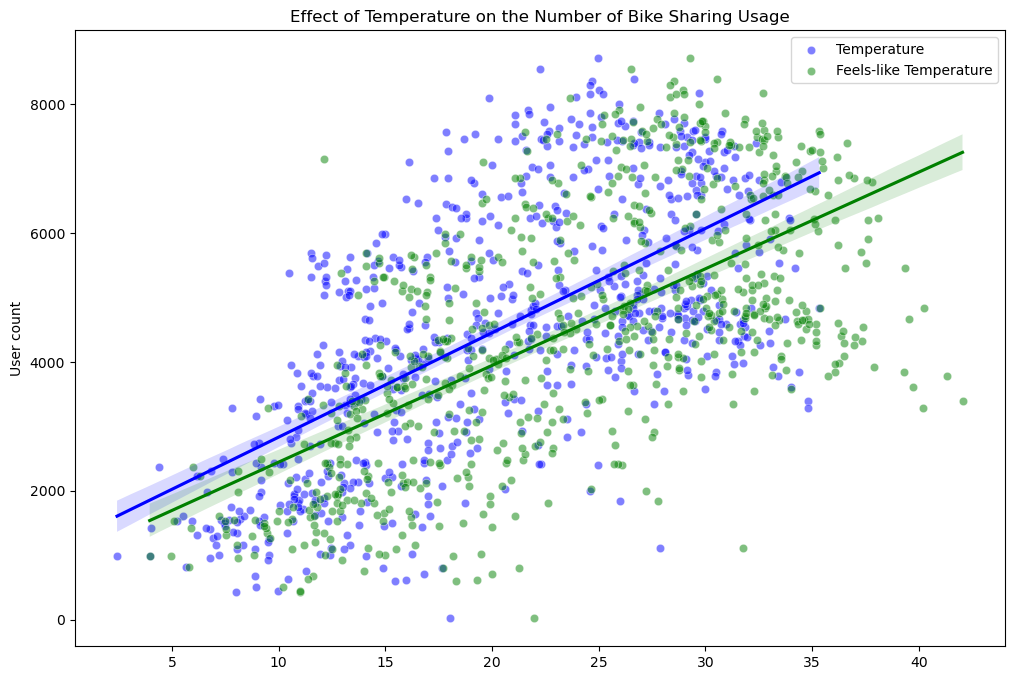

In [75]:
# Membuat scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=day_df, x='temp', y='cnt', color='blue', label='Temperature', alpha=0.5, marker='o')
sns.scatterplot(data=day_df, x='atemp', y='cnt', color='green', label='Feels-like Temperature', alpha=0.5, marker='o')

# Menambahkan garis linear untuk temp
sns.regplot(data=day_df, x='temp', y='cnt', scatter=False, color='blue')

# Menambahkan garis linear untuk atemp
sns.regplot(data=day_df, x='atemp', y='cnt', scatter=False, color='green')

plt.title('Effect of Temperature on the Number of Bike Sharing Usage')
plt.xlabel(None)
plt.ylabel('User count')
plt.legend()
plt.show()

Berdasarkan grafik scatter plot yang ditampilkan
- Ya, terdapat korelasi positif yang jelas antara suhu dan jumlah pengguna layanan Bike Sharing
- Pengaruhnya dapat diuraikan menjadi 4 hal: 
1. Korelasi positif: seiring dengan meningkatnya suhu, jumlah pengguna Bike Sharing cenderung meningkat, hal ini ditunjukkan dengan garis linear yang naik untuk kedua variabel suhu.
2. Konsistensi: pola yang ditemukan konsisten baik untuk suhu aktual (biru) dan suhu yang dirasakan (hijau).
3. Variabilitas: meskipun terdapat tren umum yang meningkat, terdapat variabilitas yang cukup besar pada jumlah pengguna yang timbul akibat suhu tertentu, hal ini ditunjukkan oleh sebaran titik-titik data.
4. Perbedaan suhu aktual vs dirasakan: garis tren untuk suhu yang dirasakan (hijau) sedikit lebih curam dibandingkan suhu aktual (biru) hal ini dapat menandakan bahwa persepsi suhu mungkin memiliki pengaruh sedikit lebih kuat terhadap keputusan dalam menggunakan Bike Sharing.

Kesimpulannya adalah terdapat korelasi positif yang cukup signifikan antara suhu dan jumlah pengguna Bike Sharing. Semakin tinggi suhu (dalam batas tertentu) semakin banyak orang cenderung menggunakan layanan ini. Namun, faktor-faktor lain juga mempengaruhi jumlah pengguna, seperti yang ditunjukkan oleh variabilitas dalam data. Informasi ini tentunya dapat dimanfaatkan untuk mengoptimalkan ketersediaan sepeda berdasarkan prakiraan cuaca dan untuk merancang strategi pemasaran dengan memanfaatkan kondisi cuaca yang menguntungkan.

## Conclusion

- Conclution pertanyaan 1: Apa dampak cuaca terhadap jumlah rental sepeda dan apakah dampaknya berbeda untuk pengguna biasa vs terdaftar?
    - Kesimpulannya cuaca memiliki pengaruh signifikan terhadap penggunaan layanan sepeda, lalu dampaknya pada tipe pengguna adalah sama dengan pola yang konsisten di seluruh tipe pengguna. Informasi ini dapat digunakan untuk mengoptimalkan operasional dan strategi pemasaran layanan sepeda.

- Conclution pertanyaan 2: Pada kondisi cuaca apa bike sharing paling sedikit digunakan dan apakah ini konsisten di semua musim?
    - Kesimpulannya, cuaca `Light Snow or Rain` secara konsisten menyebabkan penggunaan bike sharing paling rendah di semua musim, menunjukkan bahwa kondisi cuaca ini memiliki dampak negatif yang signifikan terhadap penggunaan layanan bike sharing.

- Conclution pertanyaan 3: Apakah ada perbedaan signifikan antara jumlah pengguna pada hari kerja vs akhir pekan?
    -  Kesimpulannya, terlepas dari perbedaan yang kurang signifikan antara hari kerja dan akhir pekan, hari kerja memang memiliki jumlah pengguna yang sedikit lebih tinggi, namun layanan Bike Sharing tetap digunakan secara konsisten baik pada hari kerja maupun hari libur. Ini menandakan bahwa layanan tersebut digunakan sepanjang minggu, dengan sedikit kecendrungan pengguna yang lebih memakai pada hari-hari kerja.

- Conclution pertanyaan 4: Apakah ada korelasi antara suhu dengan jumlah pengguna? Bagaimana pengaruhnya?

    - Kesimpulannya adalah terdapat korelasi positif yang cukup signifikan antara suhu dan jumlah pengguna Bike Sharing. Semakin tinggi suhu (dalam batas tertentu) semakin banyak orang cenderung menggunakan layanan ini. Namun, faktor-faktor lain juga mempengaruhi jumlah pengguna, seperti yang ditunjukkan oleh variabilitas dalam data. Informasi ini tentunya dapat dimanfaatkan untuk mengoptimalkan ketersediaan sepeda berdasarkan prakiraan cuaca dan untuk merancang strategi pemasaran dengan memanfaatkan kondisi cuaca yang menguntungkan.

### Penerapan Teknik Analisis Lanjutan - RFM Analysis untuk Kondisi Cuaca

In [76]:
rfm_df = day_df.groupby(by='weathersit', as_index=False).agg({
    'dteday' : 'max',       # taking last order data
    'instant' : 'nunique',  # taking order count
    'cnt' : 'sum'           # dikarenakan di sini tidak ada revenue, maka digunakan cnt (count rentals)
})

rfm_df.columns=['weathers', 'max_order_timestamp', 'frequency', 'monetary']

rfm_df['max_order_timestamp'] = rfm_df['max_order_timestamp'].dt.date
recent_date = day_df['dteday'].dt.date.max()
rfm_df['recency'] = rfm_df['max_order_timestamp'].apply(lambda x: (recent_date - x).days)

rfm_df.drop('max_order_timestamp', axis=1, inplace=True)
rfm_df

C:\Users\Azrian.PC\AppData\Local\Temp\ipykernel_18028\1463817462.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_df = day_df.groupby(by='weathersit', as_index=False).agg({


,weathers,frequency,monetary,recency
0,Clear or Partly Cloudy,463,2257952,1
1,Mist or Cloudy,247,996858,0
2,Light Snow or Rain,21,37869,5


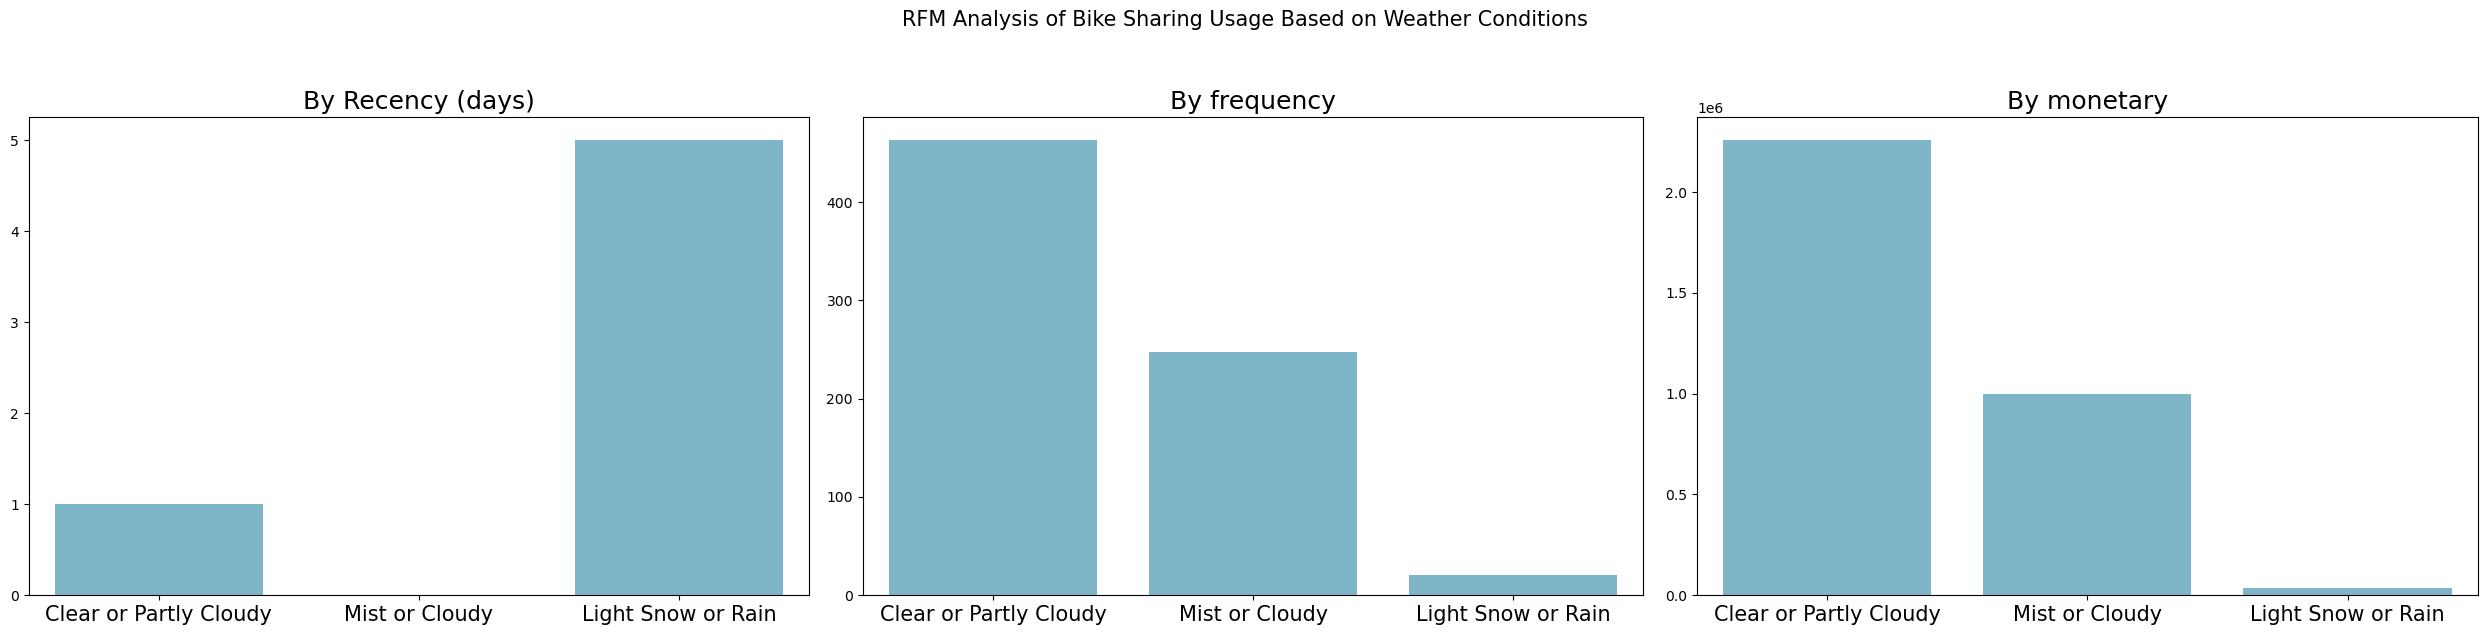

In [77]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(
    y='recency', x='weathers', 
    data=rfm_df.sort_values(by='recency', ascending=True),
    palette=colors, hue='weathers', legend=False, ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('By Recency (days)', loc='center', fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

sns.barplot(
    y='frequency', x='weathers', 
    data=rfm_df.sort_values(by='frequency', ascending=False),
    palette=colors, hue='weathers', legend=False, ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title('By frequency', loc='center', fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(
    y='monetary', x='weathers', 
    data=rfm_df.sort_values(by='monetary', ascending=False),
    palette=colors, hue='weathers', legend=False, ax=ax[2]
)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title('By monetary', loc='center', fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle('RFM Analysis of Bike Sharing Usage Based on Weather Conditions', fontsize=15, y=1.05)
plt.tight_layout()
plt.show()

Analisis RFM Penggunaan Layanan Bike Sharing berdasarkan Cuaca Menunjukkan:

1. Recency (days):

    * Penggunaan layanan bike sharing terakhir kali terjadi dalam waktu yang relatif lama saat cuaca "Light Snow or Rain". Ini mungkin menunjukkan bahwa pengguna cenderung tidak menggunakan layanan dalam kondisi cuaca yang kurang bersahabat dan lebih mungkin menggunakan layanan ketika cuaca cerah atau berawan sebagian.

2. Frequency:
    * Penggunaan layanan bike sharing paling sering terjadi saat cuaca `Clear or Partly Cloudy`. Ini menunjukkan bahwa pengguna cenderung lebih sering menggunakan layanan ketika cuaca cerah atau berawan sebagian. `Mist or Cloudy` juga menunjukkan frekuensi yang cukup tinggi, tetapi secara signifikan lebih rendah daripada `Clear or Partly Cloudy`. Frekuensi penggunaan turun drastis ketika cuaca `Light Snow or Rain`, menunjukkan bahwa pengguna cenderung menghindari penggunaan sepeda saat kondisi cuaca buruk.

3. Monetary:
    * Grafik "Monetary" menunjukkan bahwa pendapatan terbesar dari layanan bike sharing dihasilkan ketika cuaca `Clear or Partly Cloudy`, diikuti oleh `Mist or Cloudy`. Pendapatan yang sangat rendah terjadi saat cuaca `Light Snow or Rain`, menunjukkan bahwa kondisi cuaca yang buruk tidak hanya mengurangi penggunaan sepeda tetapi juga berpotensi mengurangi pendapatan secara keseluruhan.

#### Menyimpan File yang telah dibersihkan

In [78]:
day_df.to_csv('cleaned_day.csv', index=False)